<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/P1_EULER_IMPLICIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hola implícit és com l'explícit però derivant per l'esquerra en lloc de per la dreta (la justificació de per què ho tinc en un full lol)

he aïllat i han passat coses i em queda:

$\vec{T_i}=M^{-1}(\vec{T_{i-1}}+\vec{\Delta t})$

$M\vec{T_i}=\vec{T_{i-1}}+\vec{\Delta t}$

(són el mateix)

In [50]:
#PRIMER CALCULEM LA MATRIU M
import numpy as np
from numpy.linalg import inv
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

#CALCULS PREVIS
#recordem que les nostres dades són

    #ENUNCIAT:
C_v= 3686
rho= 1081
kappa= 0.56
sigma= 0.472
volts= 40

#vamo a calcular:
alpha_var= kappa/(C_v*rho) #es la difusivitat

N= 101   # Mallat espaial, nombre de punts que tenim
x_0= 0.02 #per la cara, pq x_f ha de ser 0.02 (2 cm) i ha d'estar normalitzat així que ha de valer 1 JA SABEM PER QUÈ ENS HEM D'INVENTAR x_0
x_f= 0.02/x_0 #normalitzar, ja que \tilde{x}=x/x_0
x_i= 0
t_i= 0
t_0= x_0**2/alpha_var #\tilde{t}=t/t_0
t_f= 0.025 #ja està normalitzat, ho diu l'enunciat

P_ext= volts**2*sigma/(2*(x_0)**2) #calculada per anàlisi dimensional a partir de dades proporcionades, el factor 2 dividint és perquè s'ha d'agafar el voltatge efectiu
T_0= P_ext/(C_v*rho)*t_0 #KELVIN!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print("T_0=",T_0,"k")
T_init= 309.65/T_0   #CREC QUE HA D'ESTAR EN KELVIN PER LES UNITATS YOQUESE
print("T_init (JA NORMALITZADA)=",T_init,"k")
T_init_vec= np.ones((N,1))*T_init



#Variacions de les variables (tenim dos casos a l'enunciat)
dx= x_f/(N-1) #es N-1 perquè si tens N punts tens N-1 intervals!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dt_1= dx**2 # disc temps 1
dt_2= 0.5*dx**2 # disc temps 2

#CAS GENERAL PER A QUALSEVOL dx, dt:
def matriu(dt,dx):
  alpha= -dt/(dx**2) #ALFA I BETA SÓN DIFERENTS A L'IMPLÍCIT I A L'EXPLÍCIT LOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLOLLLOLOLOLOLOLOLOL
  beta= 1+2*dt/(dx**2)
  #Creació de la matriu
  col1= [0]*(N)
  col1[0]= beta
  col1[1]= alpha
  fila1= [0]*(N)
  fila1[1]= alpha
  matriu = toeplitz(col1, fila1)
  #CONDICIONS DE CONTORN!!!!!
  matriu[0,:]  = 0 #això vol dir que tots els elements (:) de la primera fila (la fila 0, corresponent al temps inicial t=0) valen 0
  matriu[0,0]  = 1 #i després de fer que tots els elements valguin 0 fas que el primer (el de la primera fila i la primera columna
                      #és a dir, el primer de la diagonal) valgui 1, de forma que quan multipliques la matriu per T_inic et continua
                      #quedant T_inic
  matriu[-1,:] = 0 #el mateix que abans, fas que tots els elements de la última fila siguin 0 excepte el de l'última columna, és a dir,
                      #l'últim de la diagonal, el qual val 1
  matriu[-1,-1]= 1
  return matriu

matriu_1=matriu(dt_1,dx)
matriu_2=matriu(dt_2,dx)
# print(matriu_1)
# print(matriu_2)

#ja coneixem la matriu M que té a la diagonal beta envoltada de alpha
#EULER CÀLCUL

def Euler_implicit (T_i, t_f, dt, dx): #TOTES LES VARIABLES SÓN ESCALARS
    T_i_vec=np.ones((N,1))*T_i
    i=1
    t_i=0
    x_i=0
    while t_i<t_f: #com la nostra equació és de la forma Ax=b, on A=inv(M) i x=\vec{T_i}, anem a trobar b=\vec{T_{i-1}+∆t}
      b = T_i_vec + np.ones((N,1)) * dt
      b[0]  = T_i
      b[-1] = T_i
      T_i_vec = np.matmul(inv(matriu(dt,dx)), b)
      T_i_vec[0]  = T_i
      T_i_vec[-1] = T_i

      t_i = t_i + dt
      x_i = x_i + dx
      i = i + 1
    print("amb un dt=",dt,", calen",i,"iteracions per arribar al temps normalitzat", t_i)
    return T_i_vec

#i apliquem la funció que hem creat als nostres dos casos de discretitzacions
T_i_1 = Euler_implicit(T_init, t_f, dt_1, dx)
T_i_2 = Euler_implicit(T_init, t_f, dt_2, dx)

#temperatura real (kelvin)
T_real_1 = T_i_1 * T_0
T_real_2 = T_i_2 * T_0

# print("Temperatura real cas 1 (graus centrigrads):")
# print(T_real_1-273.15)

# print("Temperatura real cas 2 (graus centrigrads):")
# print(T_real_2-273.15)

T_0= 674.2857142857143 k
T_init (JA NORMALITZADA)= 0.4592266949152542 k
amb un dt= 0.0001 , calen 252 iteracions per arribar al temps normalitzat 0.025099999999999904
amb un dt= 5e-05 , calen 501 iteracions per arribar al temps normalitzat 0.025000000000000203


ARA A GRAFICAR AIXÒ I COMPARAR ELD DOS CASOS DE dt AMB LA SOLUCIÓ ANALÍTICA

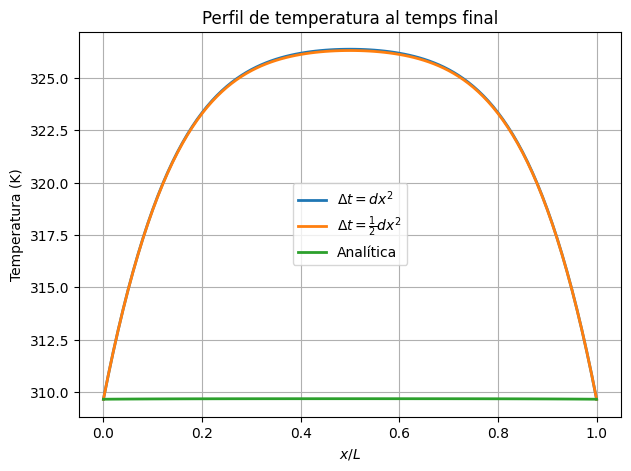